## Visualizacion de datos

In [57]:
import pandas as pd

pd.set_option('display.max_columns', None)

#Lectura de la base de datos
df = pd.read_csv('DB/cars.csv', sep=';') # Cambio en el separador
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,SI,NO,NO,Medio,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,SI,NO,SI,Alto,NO DATA,No,NO,2.30,1818,0,1,3,21,3


## Valores nulos

Vamos a realizar un analisis de los valores nulos (NaN).

Para ello comenzamos leyendo los datos y viendo cuantos datos faltantes hay por columna:

In [58]:
#Valores nulos
df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls

,Nulos
CODE,0
PRODUCTO,0
TIPO_CARROCERIA,0
COMBUSTIBLE,0
Potencia_,0
TRANS,0
FORMA_PAGO,0
ESTADO_CIVIL,890
GENERO,860
OcupaciOn,0


Vemos que tenemos datos nulos en 4 columnas, vamos a mostrar el contenido de dichas columnas en un dataframe por separado para una mayor visualizacion

In [59]:
null_df = df[['Averia_grave', 'ESTADO_CIVIL', 'GENERO', 'Zona _Renta']]
null_df

,Averia_grave,ESTADO_CIVIL,GENERO,Zona _Renta
0,Averia muy grave,CASADO,M,Medio-Bajo
1,No,CASADO,F,Medio-Bajo
2,No,CASADO,M,Medio
3,Averia muy grave,CASADO,F,Medio
4,No,CASADO,F,Alto
...,...,...,...,...
58044,Averia muy grave,SOLTERO,F,NaN
58045,No,NaN,NaN,Medio-Bajo
58046,No,CASADO,M,Medio
58047,No,CASADO,M,Medio-Bajo


Vemos los valores faltantes. 

En este caso, vamos a sustituirlos por 'Desconocido' (ya que estas columnas no son de tipo numerico), salvo en el caso de la columna 'Averia_grave', que al contener un unico valor faltante, vamos a dropear el registro en el que se encuentre dicho valor: 

In [60]:
null_cols = []
# Sustituimos valores nulos
for column, count in df_nulls['Nulos'].items():
    if count != 0:
        null_cols.append(column)
        if column == 'Averia_grave':
            df.dropna(subset=[column], inplace=True)
        elif column == 'ESTADO_CIVIL':
            df[column] = df[column].fillna('DESCONOCIDO')
        elif column == 'GENERO':
            df[column] = df[column].fillna('O')
        elif column == 'Zona _Renta':
            df[column] = df[column].fillna('Desconocido')   

# Una vez que se han eliminado los valores nulos, verificamos que hemos hecho la transoformacion correctamente
df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls.loc[null_cols]

,Nulos
ESTADO_CIVIL,0
GENERO,0
Zona _Renta,0
Averia_grave,0


Vemos que hemos solucionado el problema de los valores nulos perfectamente.

## Heatmap y boxplots

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

Para ver la relación entre las variables utilizaremos el heatmap, que nos ofrece una imagen de calor muy visual para detectar casos de multicolinearidad.

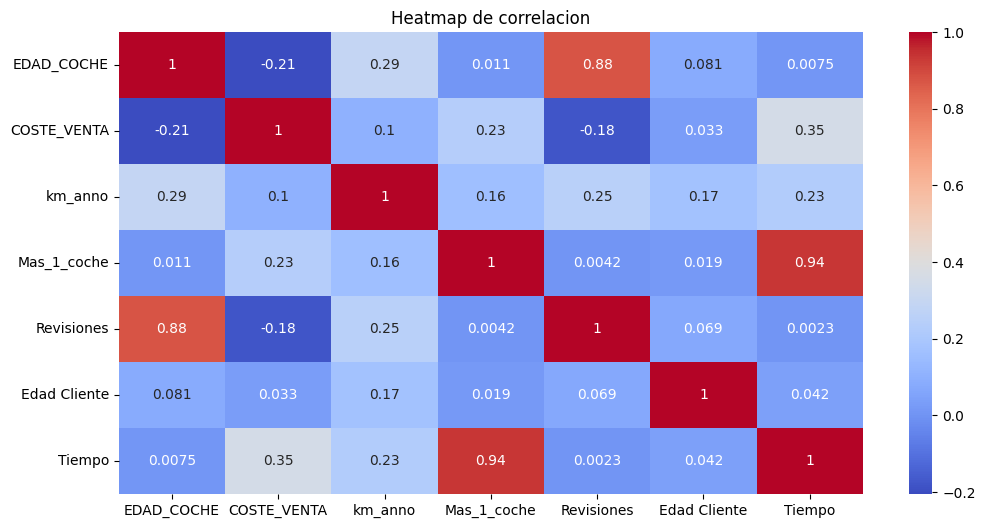

In [62]:
num_col = df.select_dtypes(include = ['float64', 'int64']).columns
corr = df[num_col].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de correlacion')
plt.show()

Como vemos hay variables muy relacionadas entre sí. Esto no va a favorecer a nuestro modelo, por lo que las vamos a eliminar:

In [63]:
df.drop(['Tiempo', 'Revisiones'], axis=1, inplace=True)

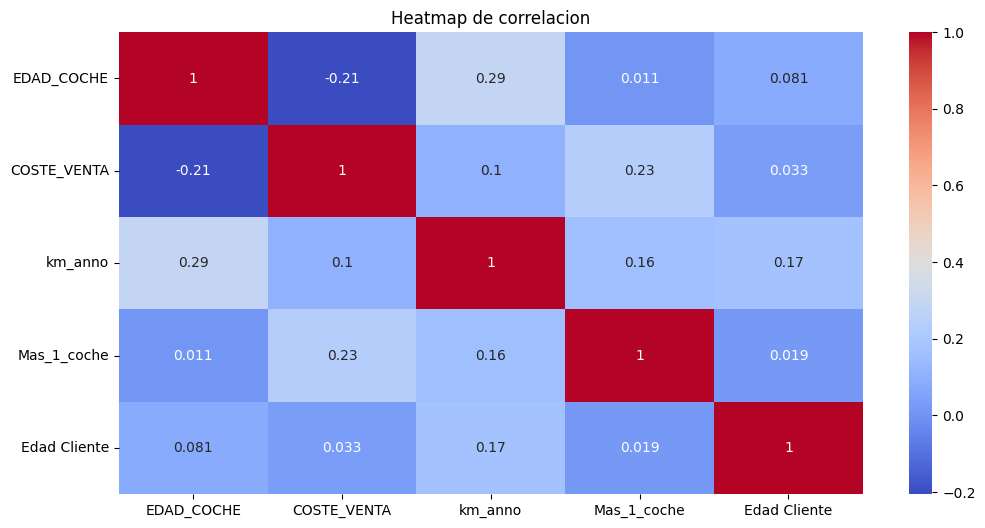

In [64]:
num_col = df.select_dtypes(include = ['float64', 'int64']).columns
corr = df[num_col].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de correlacion')
plt.show()

Ahora ya vemos que no hay ninguna variable muy relacionada entre sí.

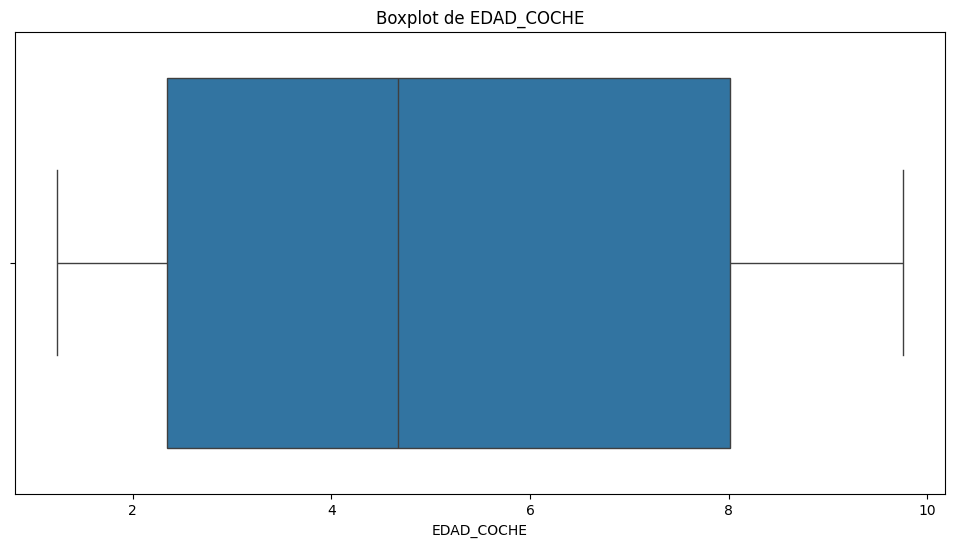

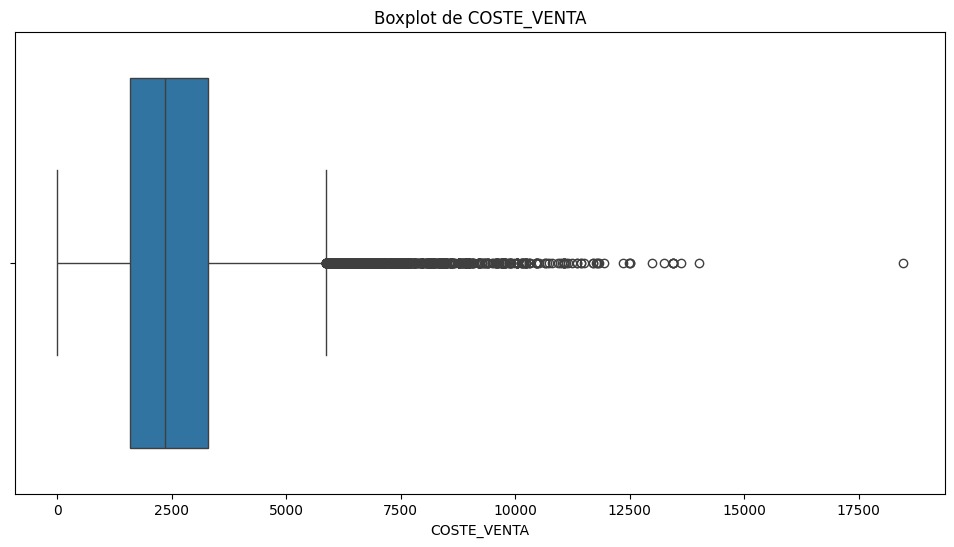

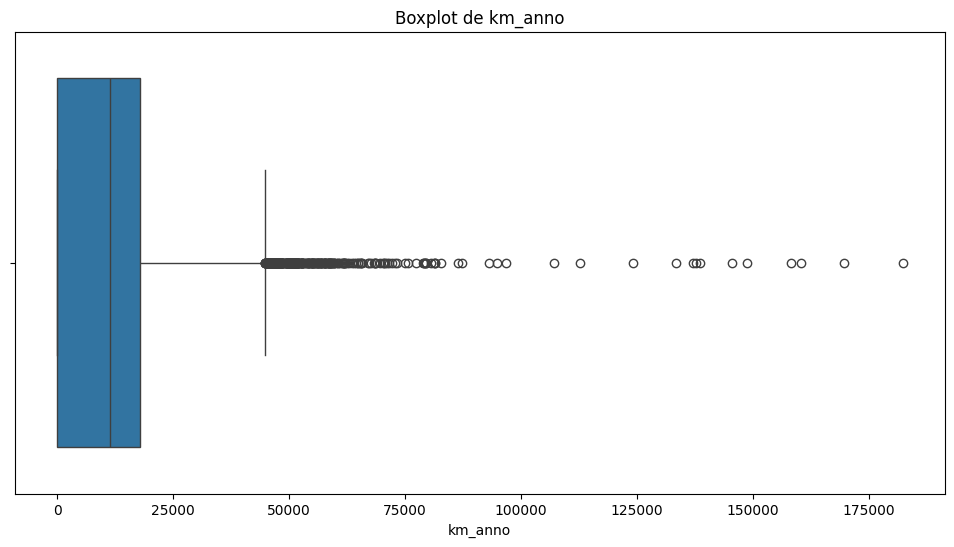

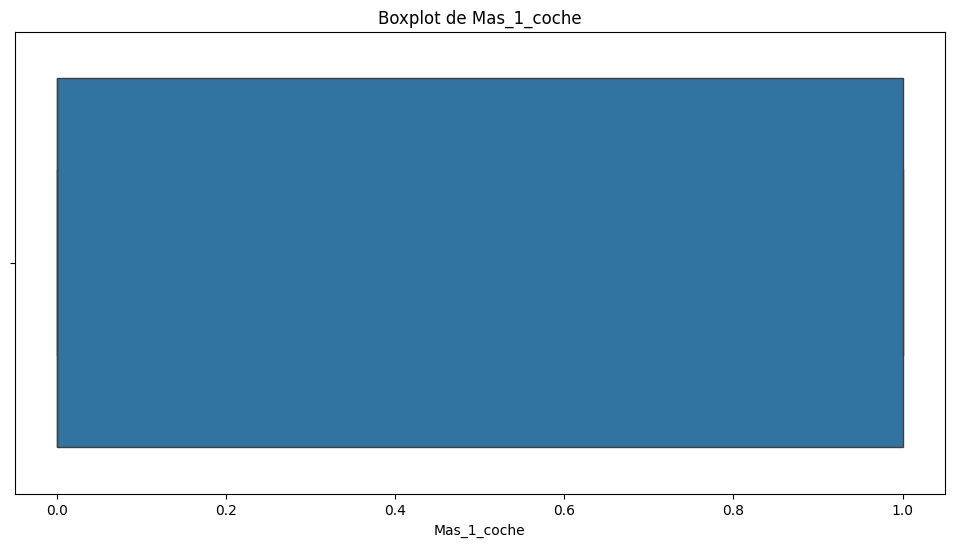

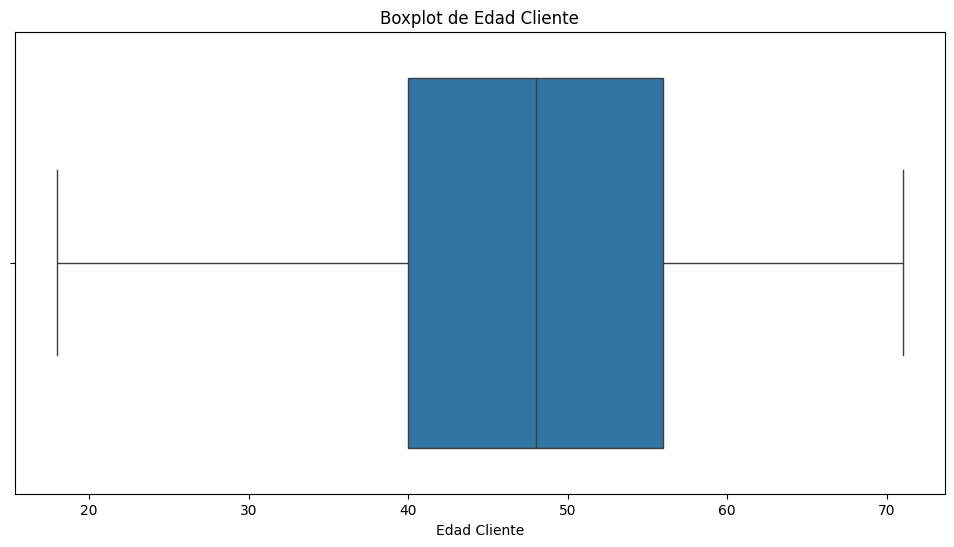

In [65]:
num_col = df.select_dtypes(include = ['float64', 'int64']).columns
for col in num_col:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Label Encoder

Para manejar las variables categoricas, vamos a aplicar un encoder para pasar de tipo objecto a numerico, para poder utilizar el mayor numero de datos posible en nuestro modelo de prediccion.

Lo hacemos de la siguiente manera:

In [66]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df):
    cat_col = df.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    for col in cat_col:
        df[col] = le.fit_transform(df[col])
    return df

df = label_encoder(df)
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Edad Cliente
0,0,0,0,0,1,1,0,0,1,1,4,1,0,0,3,0,2,1,2.08,2892,0,0,18
1,11111,0,0,0,1,1,0,0,0,1,47,0,0,0,3,1,3,0,2.45,1376,7187,0,53
2,22222,0,0,0,1,1,3,0,1,1,30,0,0,0,2,0,3,0,2.51,1376,0,1,21
3,33333,0,0,0,1,1,2,0,0,1,32,1,0,0,2,1,2,1,2.43,2015,7256,1,48
4,44444,0,0,0,1,1,2,0,0,2,41,1,0,1,0,0,3,0,2.30,1818,0,1,21


In [67]:
import os
if not os.path.exists('DB/cleaned'):
    os.mkdir('DB/cleaned')
df.to_csv('DB/cleaned/cars_cleaned.csv', index=False)